In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from typing import List, Tuple
import pandas as pd
import numpy as np

In [4]:
def setup_publication_plot(
    figsize: Tuple[float, float] = (5.5, 4),
) -> Tuple[plt.Figure, plt.Axes]:
    """Setup publication-quality plot with LaTeX styling"""
    plt.style.use("seaborn-v0_8-paper")
    plt.rcParams.update(
        {
            "font.family": "serif",
            "font.size": 10,
            "axes.labelsize": 10,
            "axes.titlesize": 11,
            "xtick.labelsize": 9,
            "ytick.labelsize": 9,
            "legend.fontsize": 9,
            "figure.figsize": figsize,
            "figure.dpi": 300,
            "savefig.dpi": 600,
            "text.usetex": True,
            "axes.grid": True,
            "grid.alpha": 0.3,
        }
    )

    return plt.subplots()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


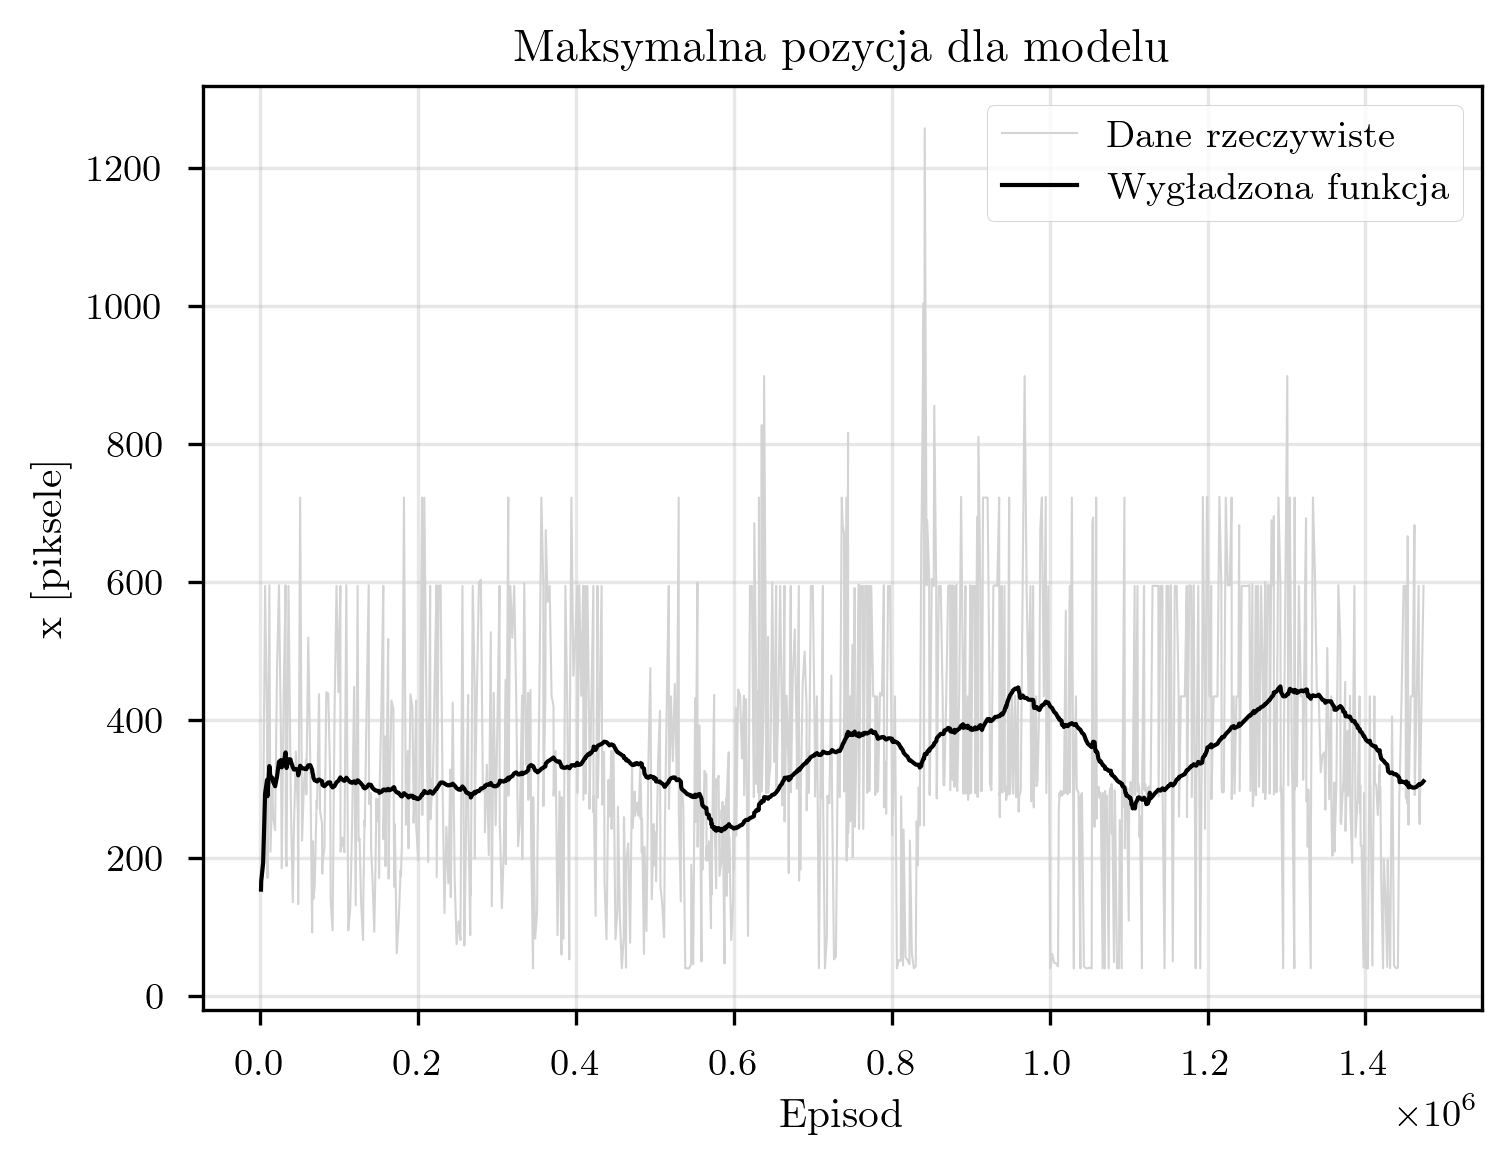

In [28]:
# Load CSV file into a pandas DataFrame

csv_file_path = 'data/1.csv' # Replace with your CSV file path
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame

fig, ax = setup_publication_plot()

filtered = df[df["model_55 - max_x"].notnull()]
max_x_smooth = filtered["model_55 - max_x"].rolling(window=100, min_periods=1).mean()

ax.plot(filtered["Step"], filtered["model_55 - max_x"], linewidth=0.5, color="lightgray", label="Dane rzeczywiste")
ax.plot(filtered["Step"], max_x_smooth, linewidth=1.0, color="black", label="Wygładzona funkcja")
ax.set_title(f"Maksymalna pozycja dla modelu")
ax.set_xlabel("Episod")
ax.set_ylabel("x [piksele]")

ax.legend()
fig.savefig(
f"max_x.eps",
format="eps",
bbox_inches="tight",
pad_inches=0.02,
)


/var/folders/k3/rxxnql1d3_g2m9h7zb60n8d40000gn/T/ipykernel_90205/2070782332.py:31: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data.iloc[-1]["color"] = c
/var/folders/k3/rxxnql1d3_g2m9h7zb60n8d40000gn/T/ipykernel_90205/2070782332.py:24: Fu

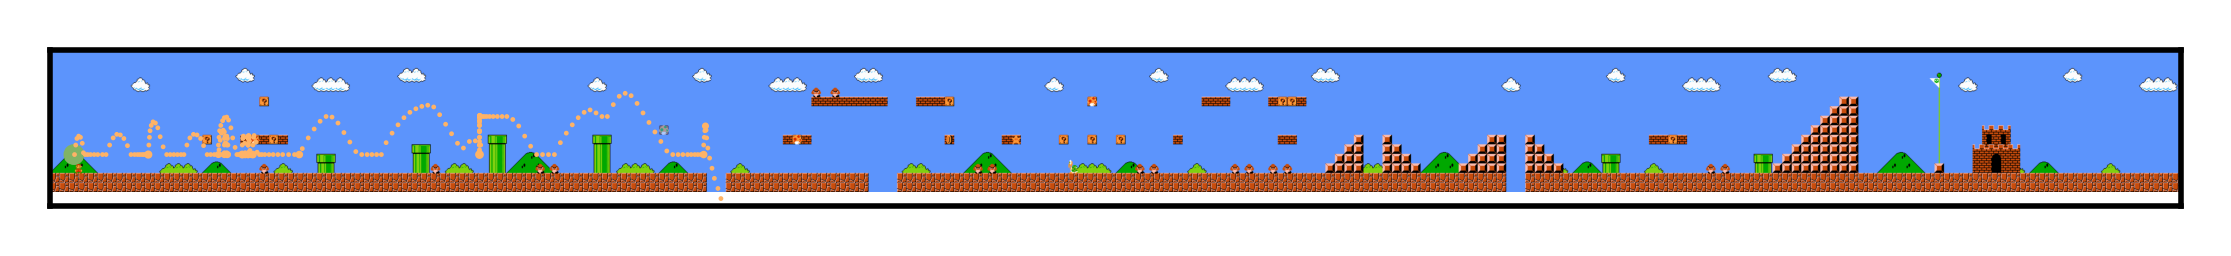

In [12]:
# Load CSV file and create DataFrame
df = pd.read_csv('55_v18_data.csv')

# Create figure and axis
fig, ax = setup_publication_plot()

fig.set_dpi(500)
# Load and display the background image
img = plt.imread('map.png')
ax.imshow(img)#, extent=[ax.get_xlim()[0], ax.get_xlim()[1], 
                   #   ax.get_ylim()[0], ax.get_ylim()[1]])

# Process data points
l_x = -100
l_y = -100
data = pd.DataFrame(columns=["x", "y", "size", "color"])
c = (0.5, 0.7, 0.4)

totaaal, _ = df.shape
for i, row in df.iterrows():
    c = (min(c[0] + (1 / float(totaaal)) * 0.9, 1), min(c[1],1), min(c[2],1))
    if l_x == row["x"] and l_y == row["y"]:
        size = data.iloc[-1]["size"]
        data.iloc[-1]["size"] = max(size + 0.01, 0.6)
    else:
        l_x = row["x"]
        l_y = row["y"]
        data.loc[len(data), "x"] = row["x"] * 2
        data.loc[len(data)-1, "y"] = row["y"] * 2
        data.loc[len(data)-1, "size"] = 0.2
        data.iloc[-1]["color"] = c



# Create scatter plot on top
#fig.gca().invert_yaxis()
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(False)
ax.scatter(data["x"], data["y"], s=data["size"].tolist(), 
          c=data["color"].tolist(), label="Pozycja agenta", zorder=2)

# Make sure scatter points appear above image
ax.set_zorder(1)
ax.patch.set_visible(False)
#ax.set_title(f"Pozycja agenta naniesiona na mapę poziomu")
#ax.legend()
fig.savefig(
f"pos.eps",
format="eps",
bbox_inches="tight",
pad_inches=0.02,
)

In [7]:
df = pd.read_csv('data/rewards.csv')

r = df[df["model_55 - reward"].notnull()]["model_55 - reward"].tolist()[-100:]
sum(r)/len(r)


127.71824817043424

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


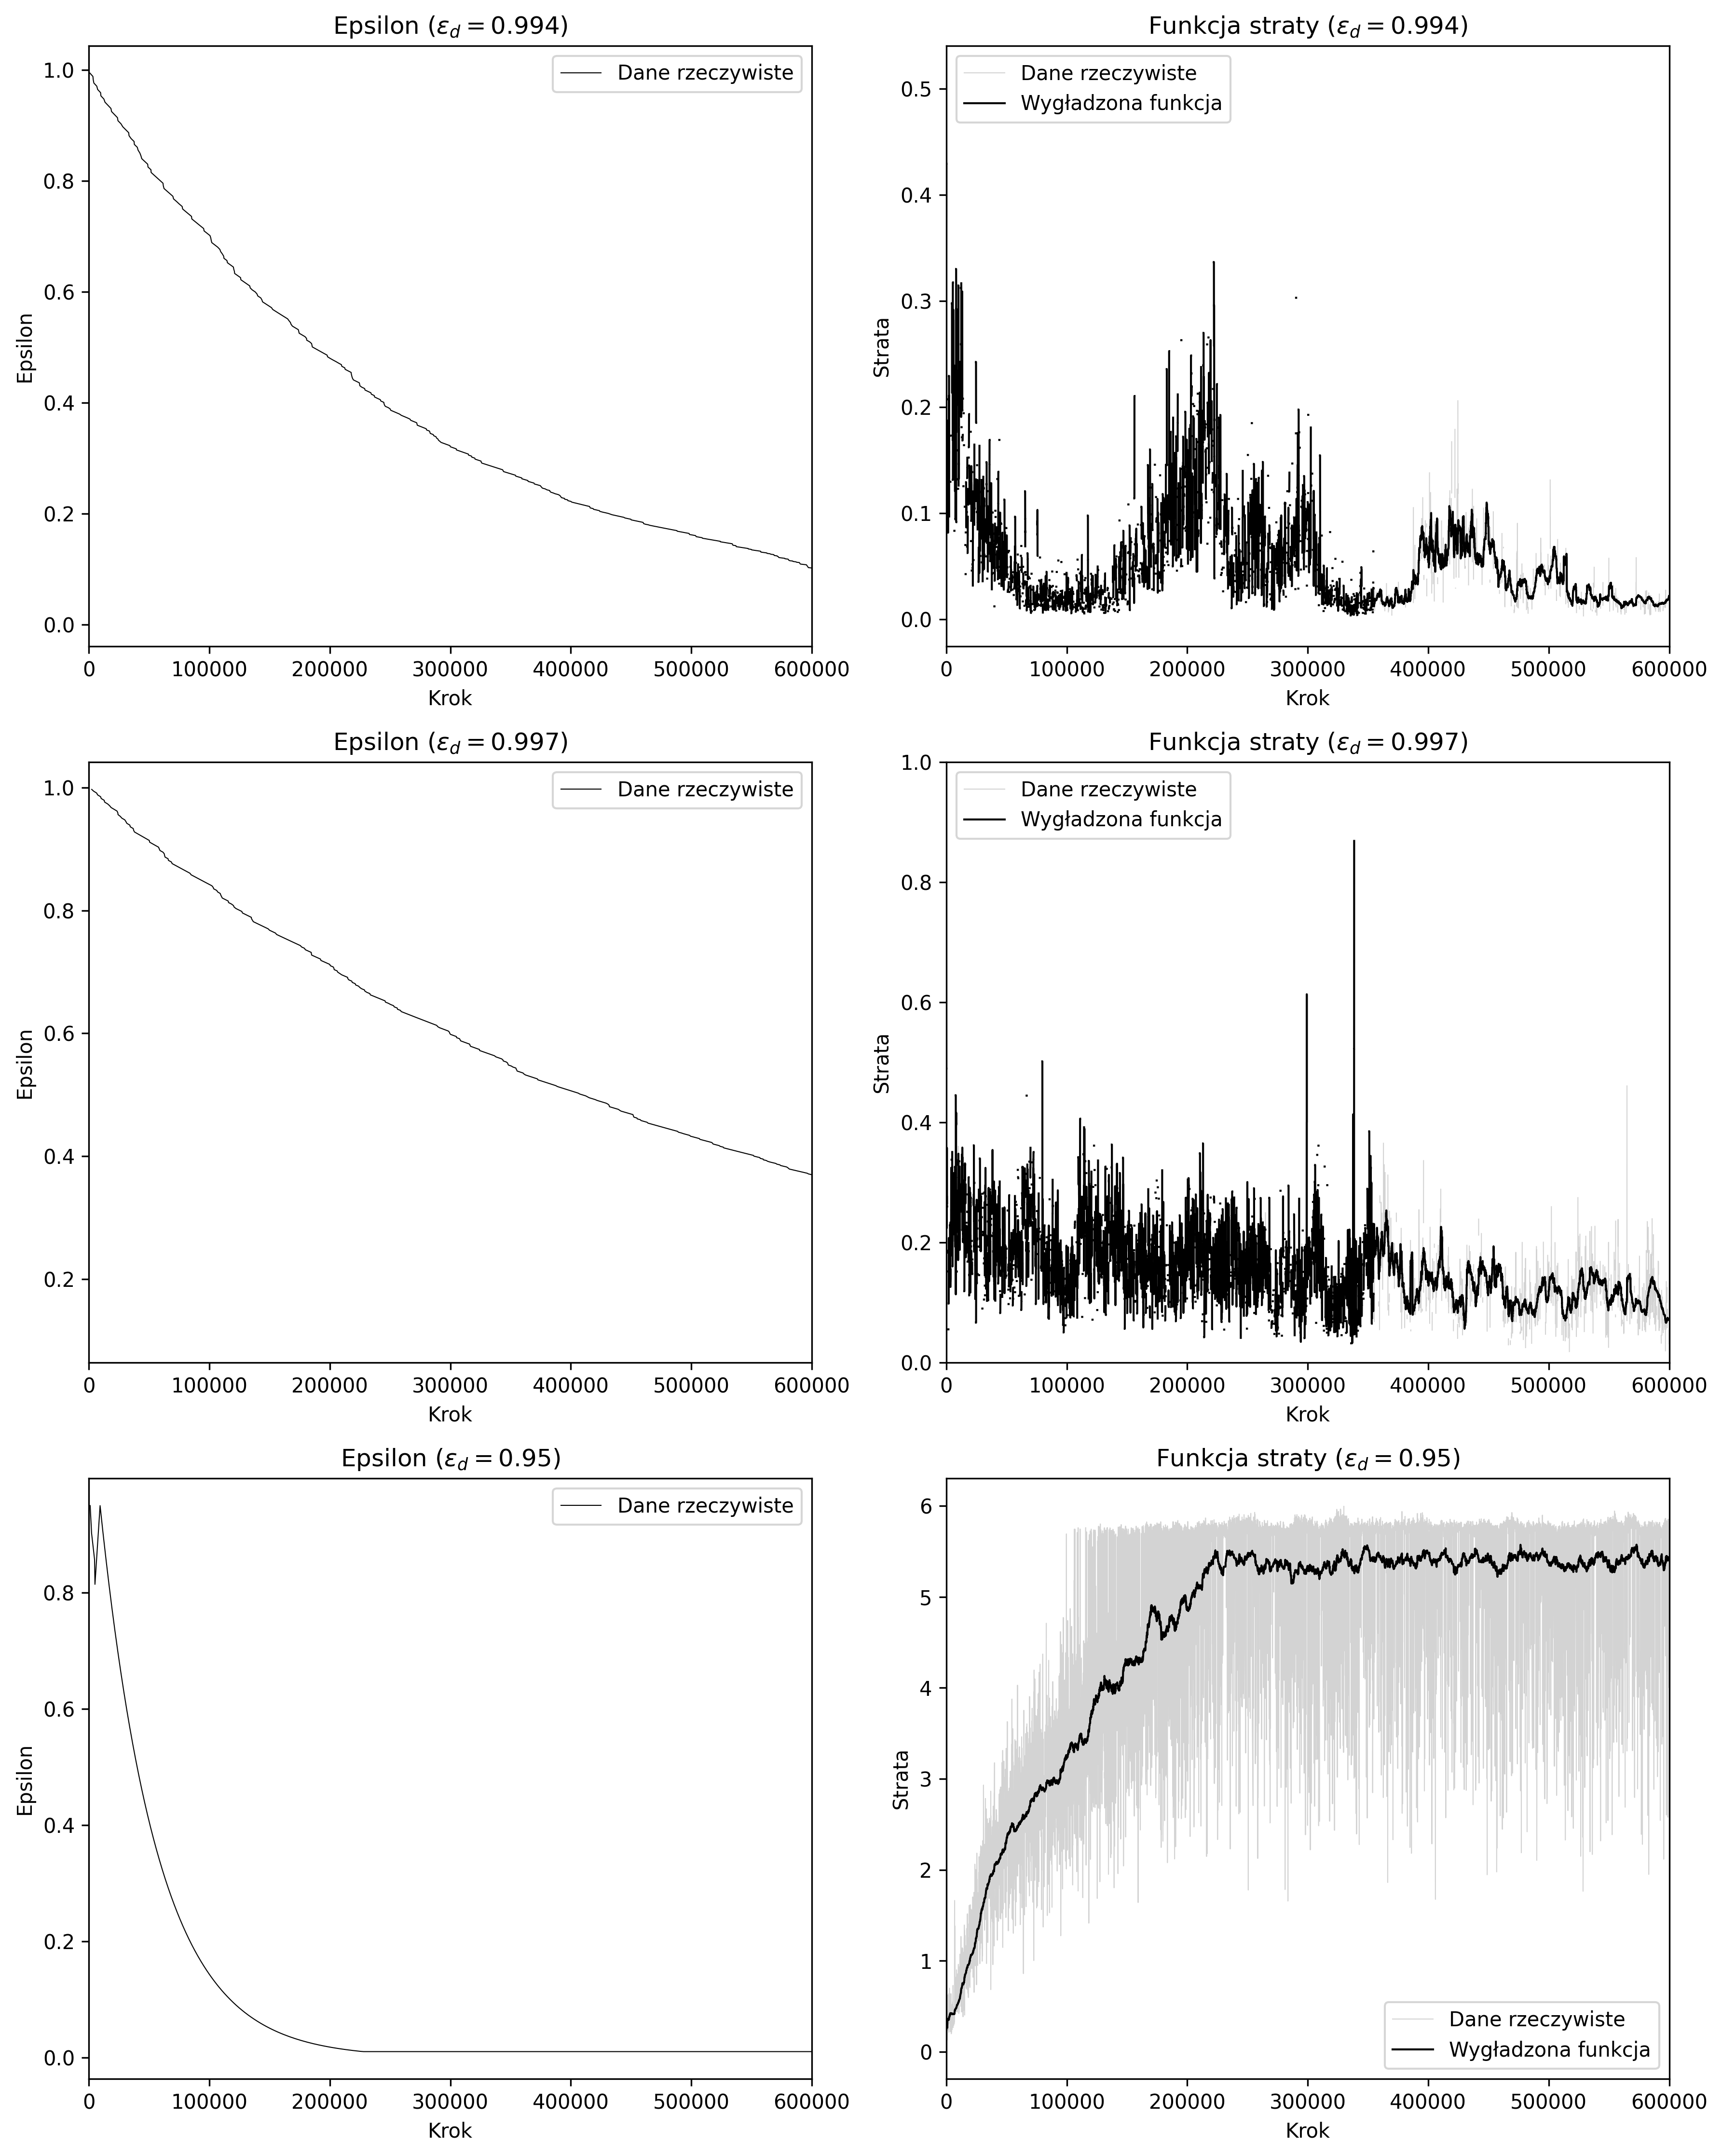

In [22]:
df = pd.read_csv('data/maxx.csv')

filtered = df[df["model_55 - max_x"].notnull()]["model_55 - max_x"]

# Create 3x2 subplots
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(12, 15))
fig.set_dpi(300)

# Row 1: Model 54
ax1.plot(filtered54["Step"], filtered54["model_54 - epsilon"], linewidth=0.5, color="black", label="Dane rzeczywiste")
ax1.set_title(r"Epsilon ($\epsilon_d = 0.994$)")
ax1.set_xlabel("Krok")
ax1.set_ylabel("Epsilon")
ax1.legend()

loss54_smooth = loss["model_54 - loss"].rolling(window=100, min_periods=1).mean()
ax2.plot(loss["Step"], loss["model_54 - loss"], linewidth=0.5, color="lightgray", label="Dane rzeczywiste")

ax2.plot(loss["Step"], loss54_smooth, linewidth=1.0, color="black", label="Wygładzona funkcja")

ax2.set_title(r"Funkcja straty ($\epsilon_d = 0.994$)")
ax2.set_xlabel("Krok")
ax2.set_ylabel("Strata")
ax2.legend()

# Row 2: Model 56
ax3.plot(filtered56["Step"], filtered56["model_56 - epsilon"], linewidth=0.5, color="black", label="Dane rzeczywiste")
ax3.set_title(r"Epsilon ($\epsilon_d = 0.997$)")
ax3.set_xlabel("Krok")
ax3.set_ylabel("Epsilon")
ax3.legend()

loss56_smooth = loss["model_56 - loss"].rolling(window=100, min_periods=1).mean()
ax4.plot(loss["Step"], loss["model_56 - loss"], linewidth=0.5, color="lightgray", label="Dane rzeczywiste")
ax4.plot(loss["Step"], loss56_smooth, linewidth=1.0, color="black", label="Wygładzona funkcja")

ax4.set_ylim(0, 1)
ax4.set_title(r"Funkcja straty ($\epsilon_d = 0.997$)")
ax4.set_xlabel("Krok")
ax4.set_ylabel("Strata")
ax4.legend()

# Row 3: Model 53
ax5.plot(df53["Step"], df53["model_53 - epsilon"], linewidth=0.5, color="black", label="Dane rzeczywiste")
ax5.set_title(r"Epsilon ($\epsilon_d = 0.95$)")
ax5.set_xlabel("Krok")
ax5.set_ylabel("Epsilon")
ax5.legend()

loss53_smooth = loss53["model_53 - loss"].rolling(window=100, min_periods=1).mean()
ax6.plot(loss53["Step"], loss53["model_53 - loss"], linewidth=0.5, color="lightgray", label="Dane rzeczywiste")
ax6.plot(loss53["Step"], loss53_smooth, linewidth=1.0, color="black", label="Wygładzona funkcja")

ax6.set_title(r"Funkcja straty ($\epsilon_d = 0.95$)")
ax6.set_xlabel("Krok")
ax6.set_ylabel("Strata")
ax6.legend()

for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    ax.set_xlim(0, 600000)

plt.tight_layout()
fig.savefig("metryki_treningu.eps",
            format="eps",
            bbox_inches="tight",
            pad_inches=0.02)


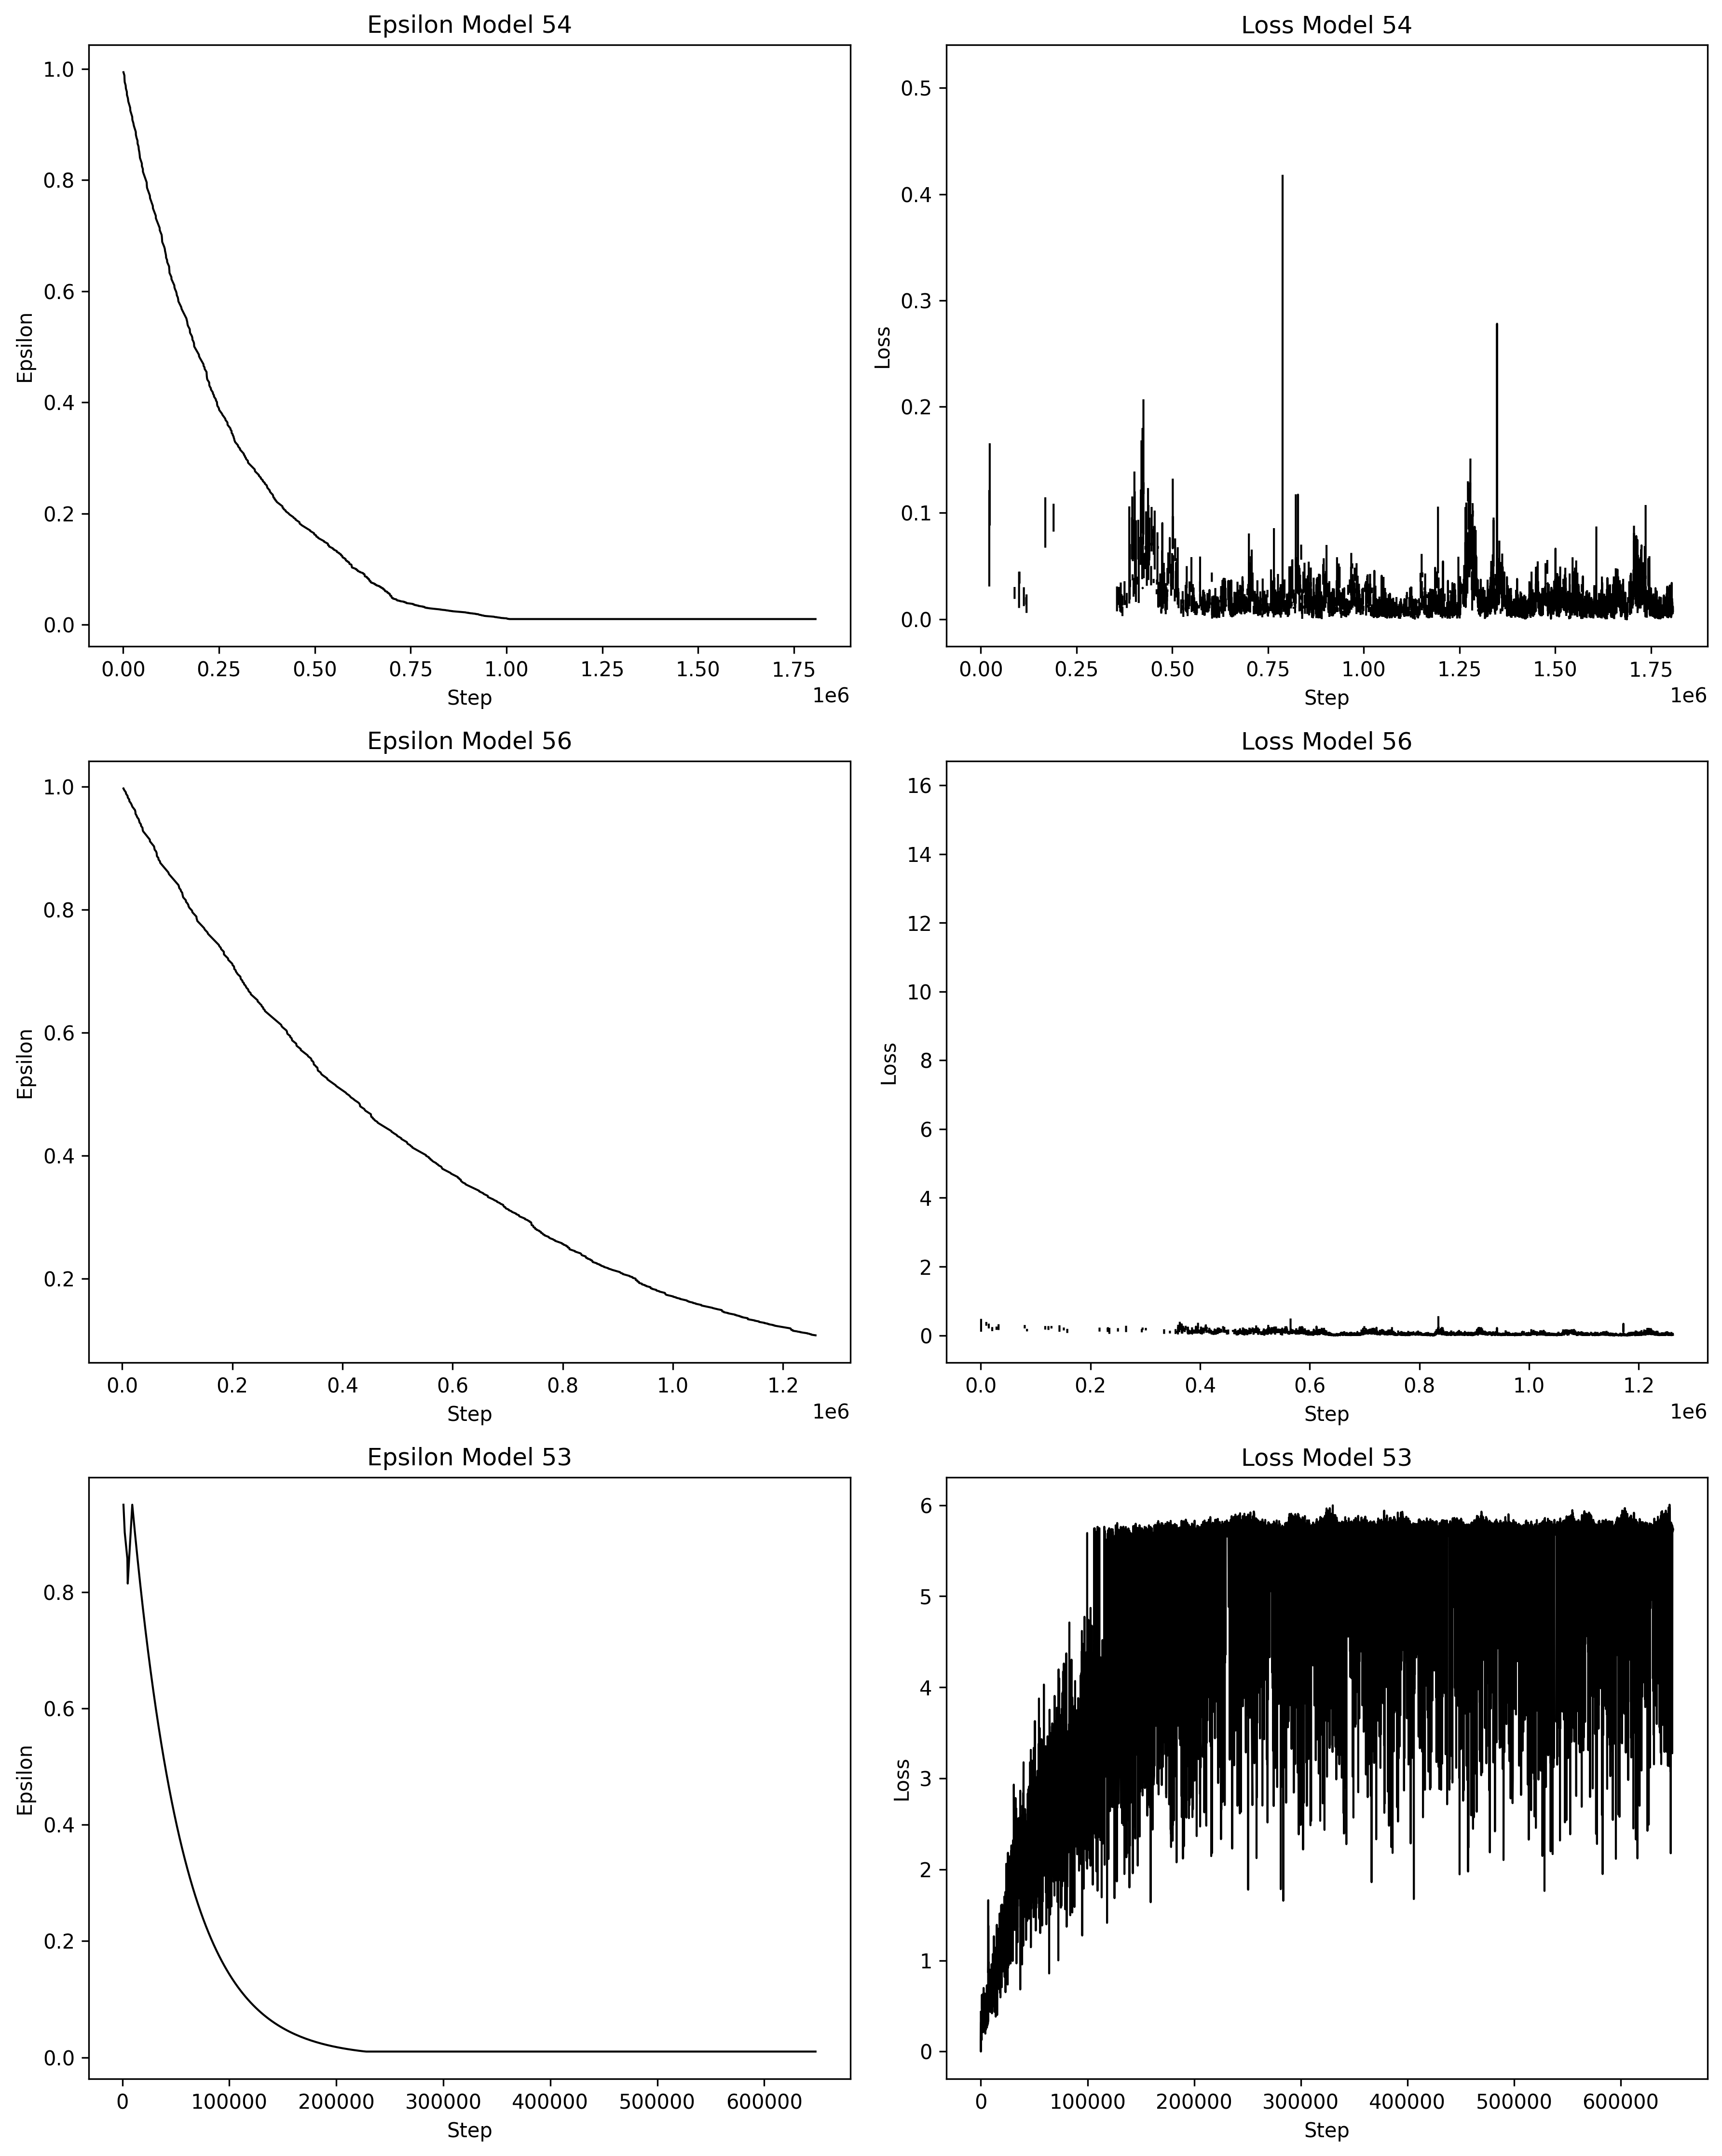

In [16]:
# 56
df = pd.read_csv('data/epsilon.csv')
filtered54 = df[df["model_54 - epsilon"].notnull()]
filtered56 = df[df["model_56 - epsilon"].notnull()]
# 53
df53 = pd.read_csv('data/epsilon53.csv')

loss = pd.read_csv('data/loss.csv')
loss53 = pd.read_csv('data/loss53.csv')
# Create 3x2 subplots
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(12, 15))
fig.set_dpi(300)

# Row 1: Model 54
ax1.plot(filtered54["Step"], filtered54["model_54 - epsilon"], linewidth=1.0, color="black")
ax1.set_title("Epsilon Model 54")
ax1.set_xlabel("Step")
ax1.set_ylabel("Epsilon")

ax2.plot(loss["Step"], loss["model_54 - loss"], linewidth=1.0, color="black")
ax2.set_title("Loss Model 54")
ax2.set_xlabel("Step")
ax2.set_ylabel("Loss")

# Row 2: Model 56
ax3.plot(filtered56["Step"], filtered56["model_56 - epsilon"], linewidth=1.0, color="black")
ax3.set_title("Epsilon Model 56")
ax3.set_xlabel("Step")
ax3.set_ylabel("Epsilon")

ax4.plot(loss["Step"], loss["model_56 - loss"], linewidth=1.0, color="black")
ax4.set_title("Loss Model 56")
ax4.set_xlabel("Step")
ax4.set_ylabel("Loss")

# Row 3: Model 53
ax5.plot(df53["Step"], df53["model_53 - epsilon"], linewidth=1.0, color="black")
ax5.set_title("Epsilon Model 53")
ax5.set_xlabel("Step")
ax5.set_ylabel("Epsilon")

ax6.plot(loss53["Step"], loss53["model_53 - loss"], linewidth=1.0, color="black")
ax6.set_title("Loss Model 53")
ax6.set_xlabel("Step")
ax6.set_ylabel("Loss")

plt.tight_layout()
fig.savefig("training_metrics.eps",
            format="eps",
            bbox_inches="tight",
            pad_inches=0.02)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


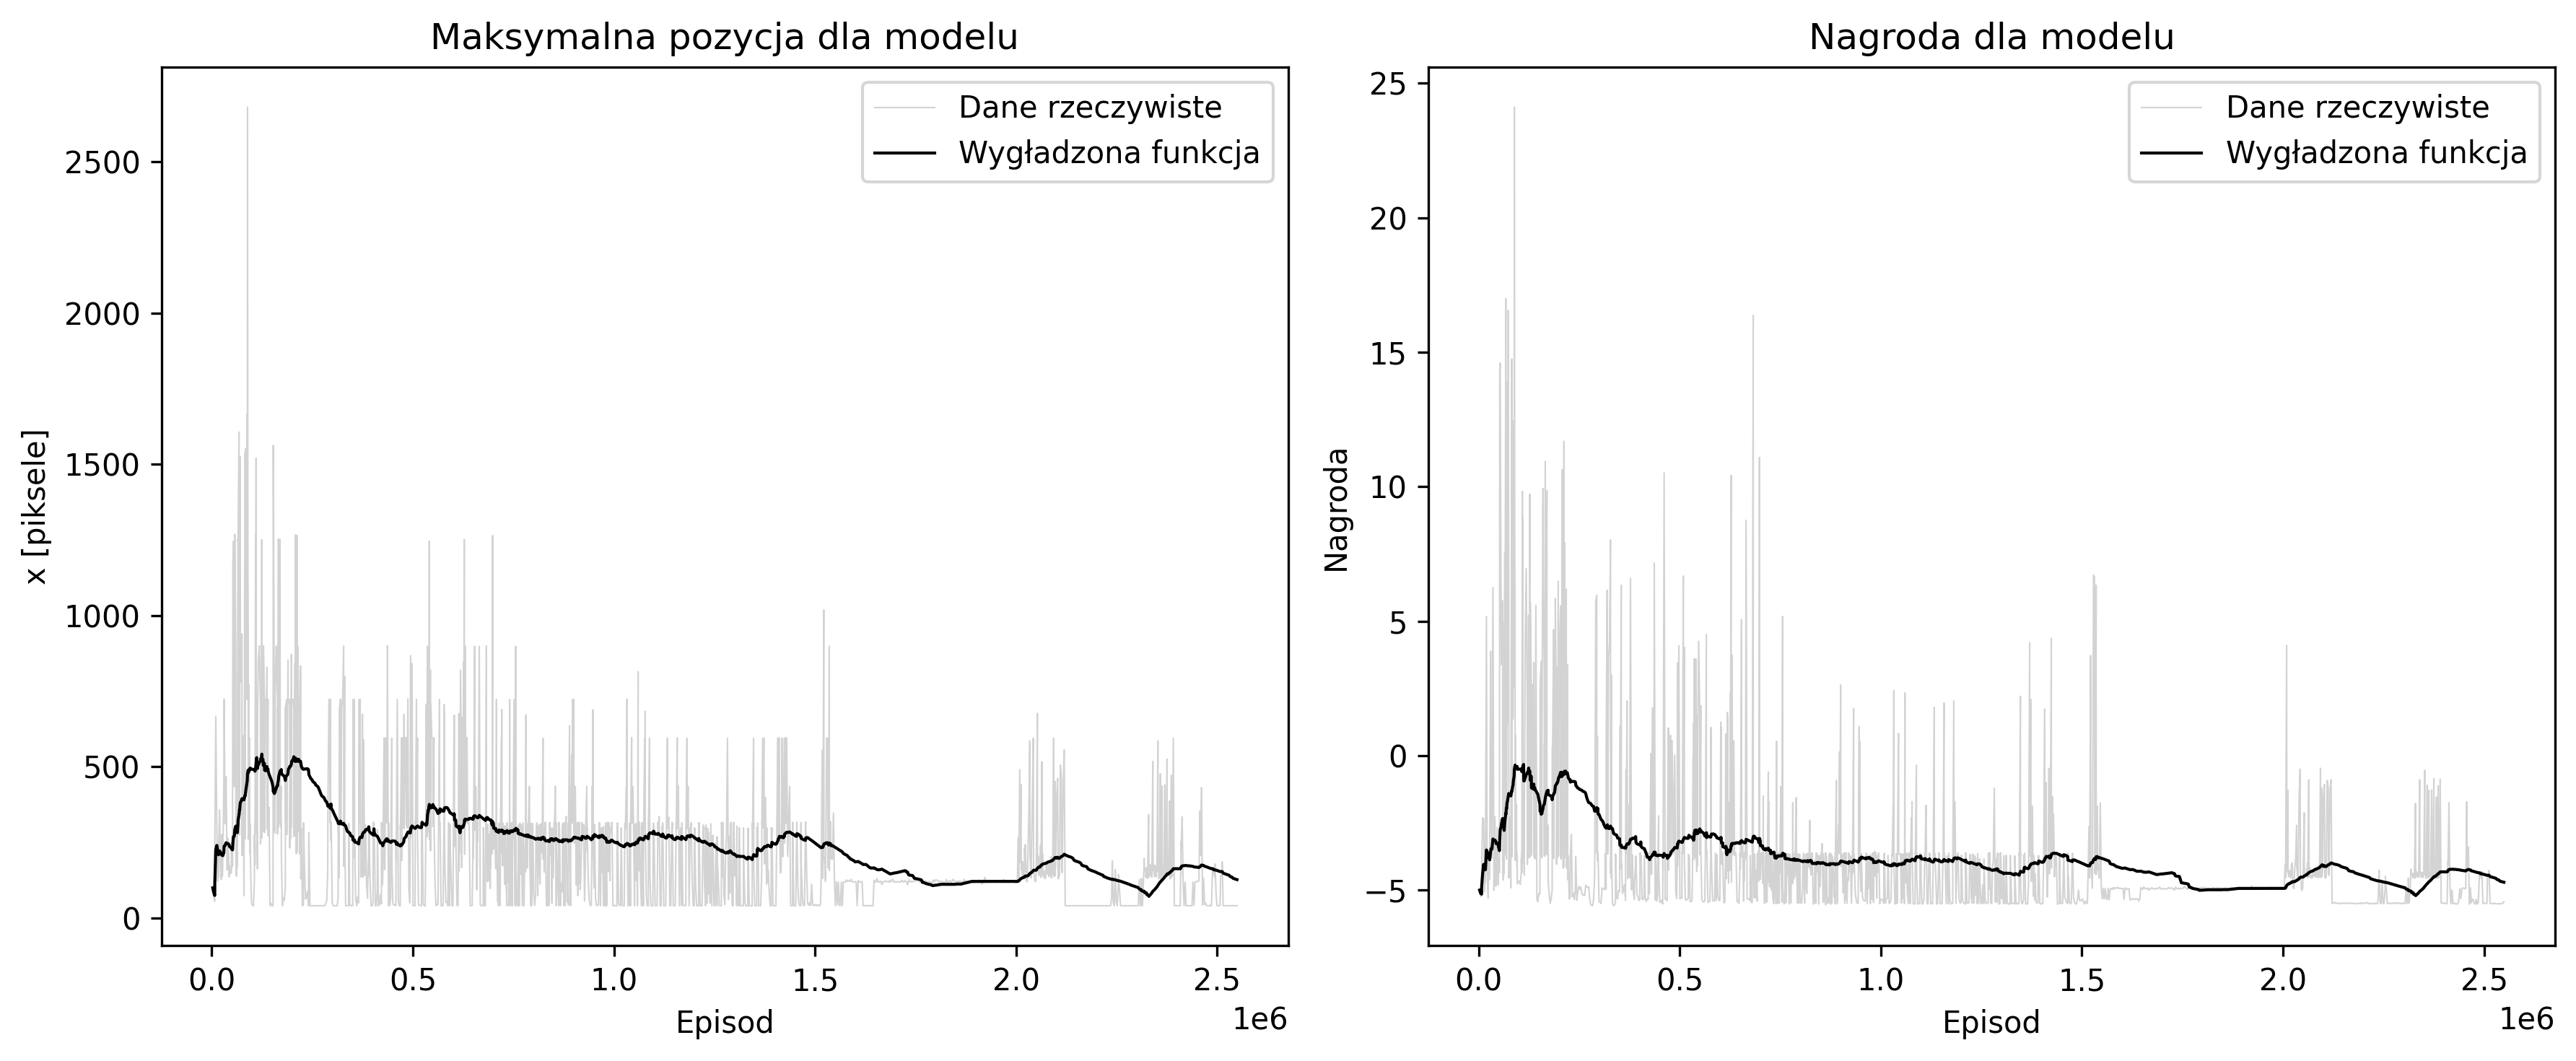

In [24]:
# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.set_dpi(300)

# Left plot - Maximum position
df_max = pd.read_csv('data/maxxwrong.csv')
filtered_max = df_max[df_max["model_3 - max_x"].notnull()]
max_x_smooth = filtered_max["model_3 - max_x"].rolling(window=100, min_periods=1).mean()

ax1.plot(filtered_max["Step"], filtered_max["model_3 - max_x"], 
         linewidth=0.5, color="lightgray", label="Dane rzeczywiste")
ax1.plot(filtered_max["Step"], max_x_smooth, 
         linewidth=1.0, color="black", label="Wygładzona funkcja")
ax1.set_title("Maksymalna pozycja dla modelu")
ax1.set_xlabel("Episod")
ax1.set_ylabel("x [piksele]")
ax1.legend()

# Right plot - Rewards
df_reward = pd.read_csv('data/rewardwrong.csv')
filtered_reward = df_reward[df_reward["model_3 - reward"].notnull()]
reward_smooth = filtered_reward["model_3 - reward"].rolling(window=100, min_periods=1).mean()

ax2.plot(filtered_reward["Step"], filtered_reward["model_3 - reward"], 
         linewidth=0.5, color="lightgray", label="Dane rzeczywiste")
ax2.plot(filtered_reward["Step"], reward_smooth, 
         linewidth=1.0, color="black", label="Wygładzona funkcja")
ax2.set_title("Nagroda dla modelu")
ax2.set_xlabel("Episod")
ax2.set_ylabel("Nagroda")
ax2.legend()

plt.tight_layout()
fig.savefig("metryki_bledne.eps",
            format="eps",
            bbox_inches="tight",
            pad_inches=0.02)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


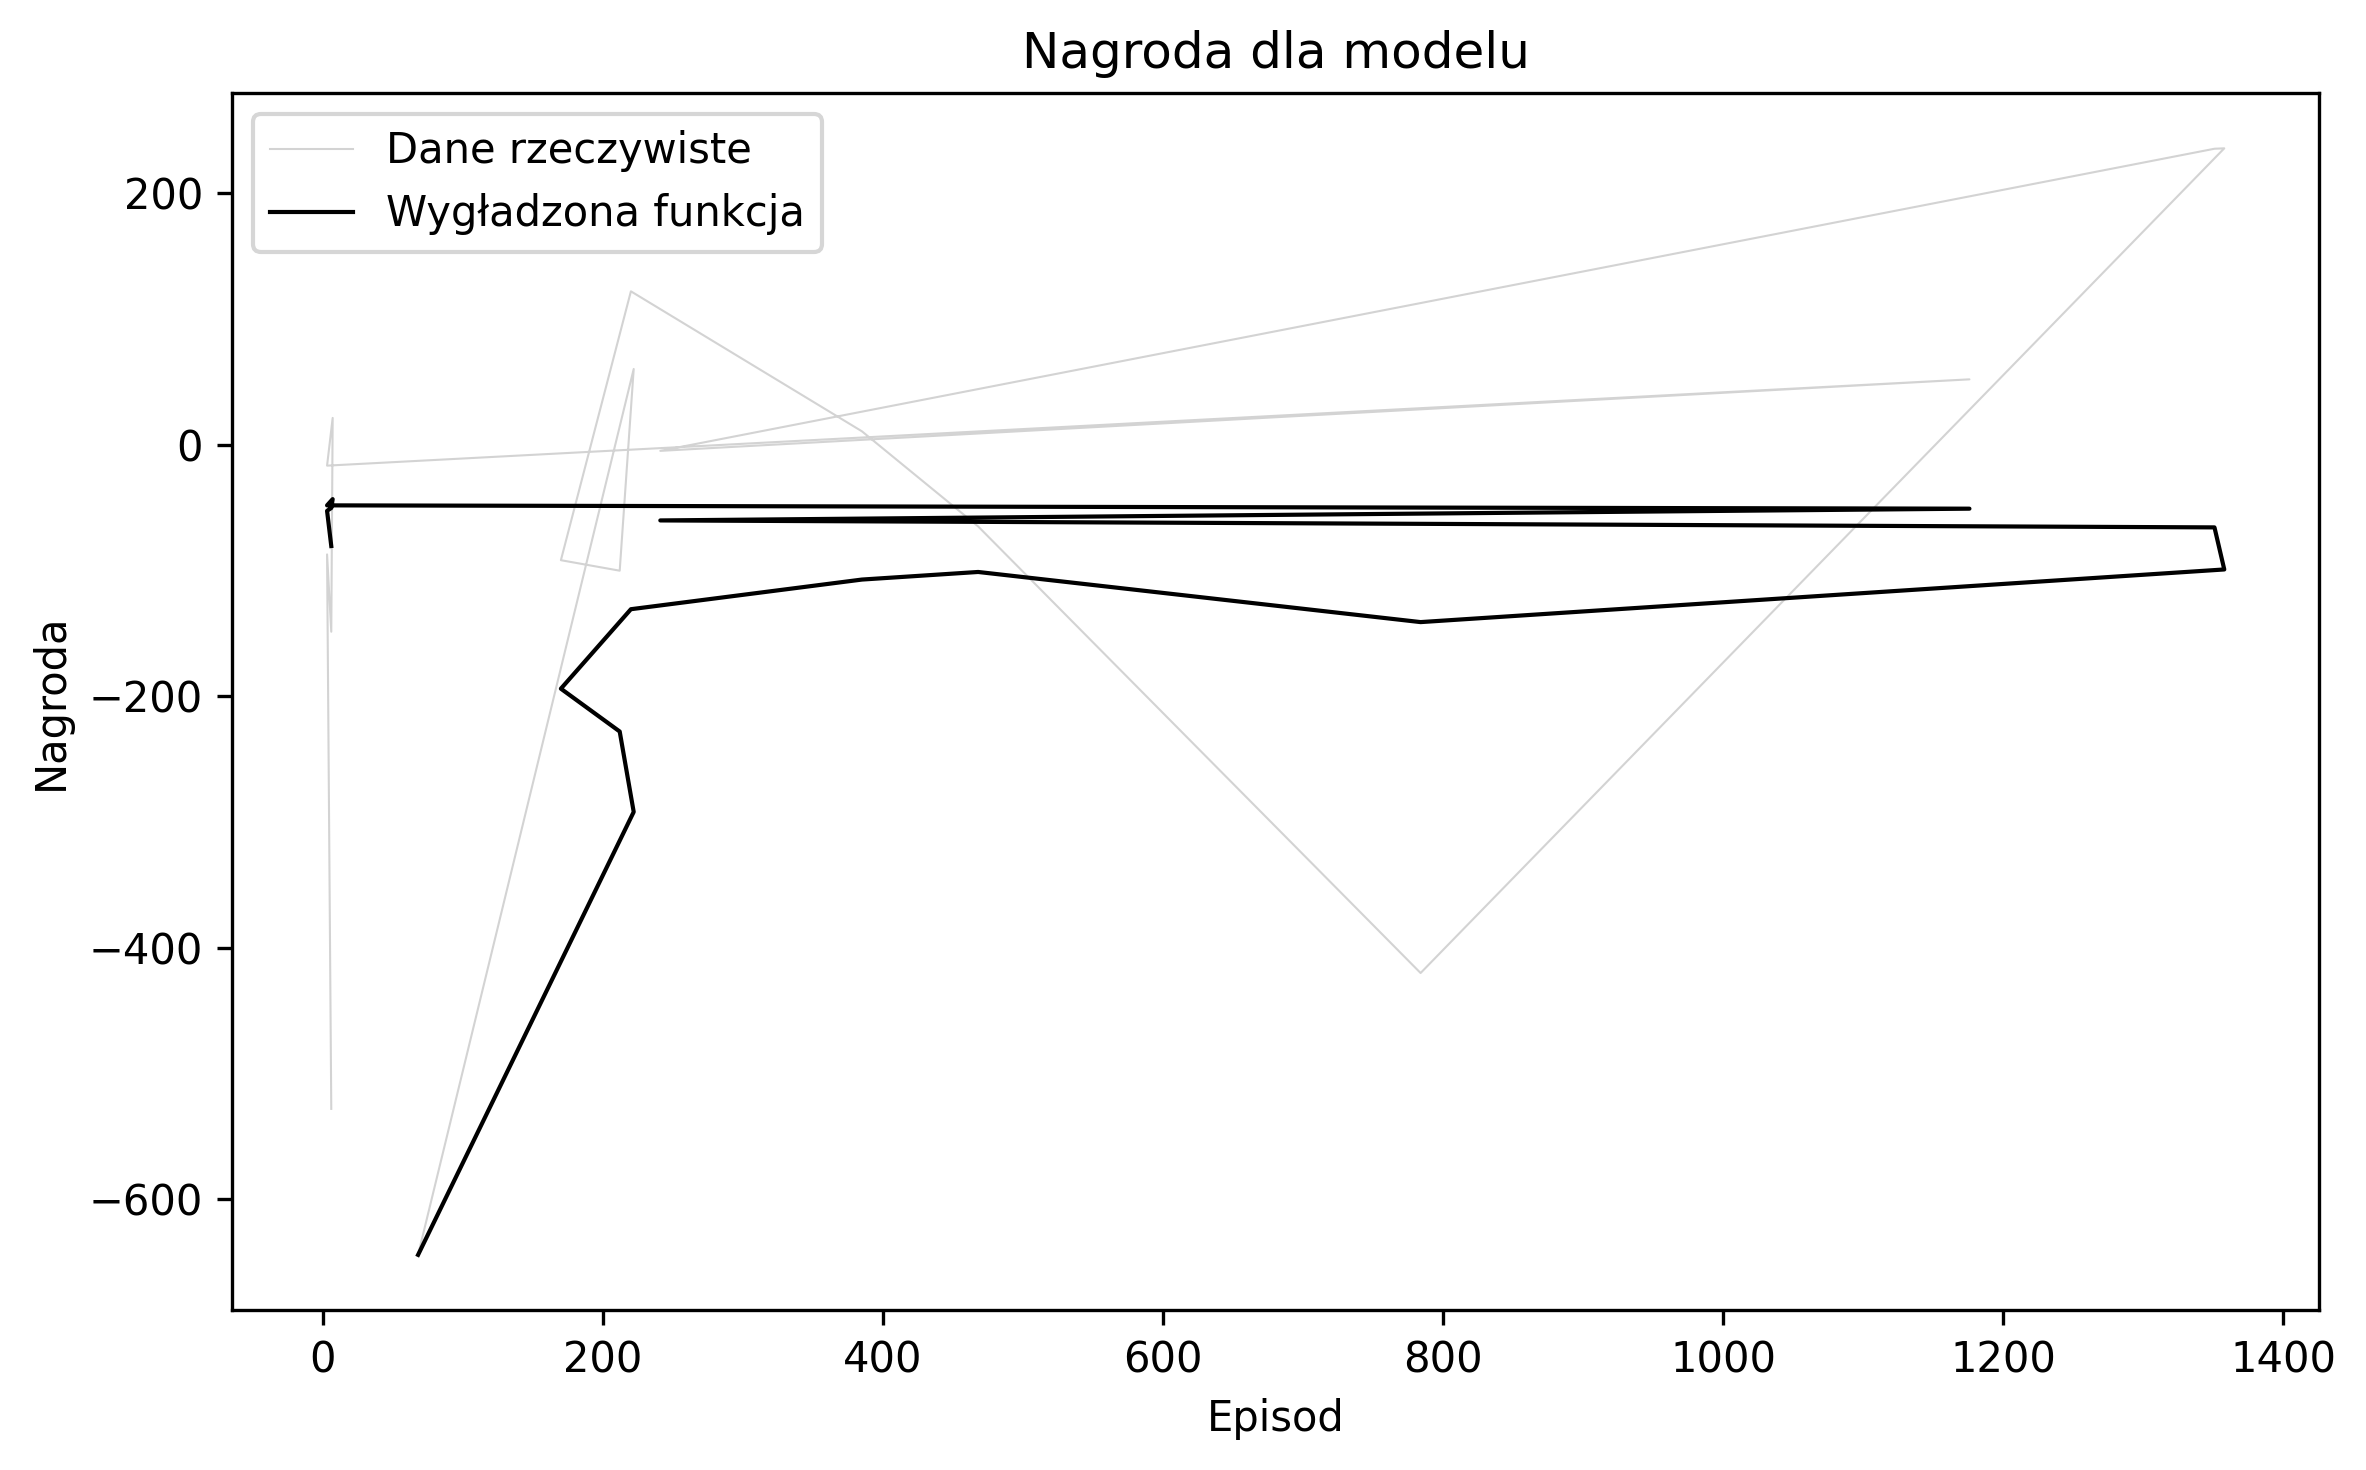

In [27]:

# Create single figure
fig, ax = plt.subplots(figsize=(8, 5))
fig.set_dpi(300)

# Load and process data
df = pd.read_csv('data/episodes.csv')
filtered = df[df["reward"].notnull()]
reward_smooth = filtered["reward"].rolling(window=100, min_periods=1).mean()

# Create plot
ax.plot(filtered["episode_count"], filtered["reward"], 
        linewidth=0.5, color="lightgray", label="Dane rzeczywiste")
ax.plot(filtered["episode_count"], reward_smooth, 
        linewidth=1.0, color="black", label="Wygładzona funkcja")

# Set labels and title
ax.set_title("Nagroda dla modelu")
ax.set_xlabel("Episod")
ax.set_ylabel("Nagroda")
ax.legend()

plt.tight_layout()
fig.savefig("nagrody_epizodow.eps",
            format="eps",
            bbox_inches="tight",
            pad_inches=0.02)